<a href="https://colab.research.google.com/github/gabriellysilva-git/Bootcamp_WomakersCode/blob/main/Probabilidade_e_Amostragem_Desafio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Carregando o arquivo CSV
df = pd.read_csv('populacao_brasileira.csv.csv')

# Visualizando as primeiras linhas para entender a estrutura
print(df.head())

   Unnamed: 0 estado  idade escolaridade nível de proficiência em inglês  \
0           0     MA     56  Fundamental                   Intermediário   
1           1     BA     46     Superior                          Básico   
2           2     AM     32  Fundamental                   Intermediário   
3           3     CE     60     Superior                          Básico   
4           4     SE     25  Fundamental                        Avançado   

     renda sexo  
0  4006.29    F  
1  2423.11    M  
2  3835.69    M  
3  1870.29    M  
4  3529.80    M  


In [3]:
# 1. Probabilidade complementar de não ser fluente em inglês (nível avançado)

# Contando o total de pessoas
total_pessoas = len(df)

# Contando pessoas com nível avançado de inglês
fluentes = len(df[df['nível de proficiência em inglês'] == 'Avançado'])

# Calculando a probabilidade de ser fluente
prob_fluente = fluentes / total_pessoas

# Probabilidade complementar (não ser fluente)
prob_nao_fluente = 1 - prob_fluente

print(f"Probabilidade de não ser fluente em inglês: {prob_nao_fluente:.2%}")

Probabilidade de não ser fluente em inglês: 65.60%


In [4]:
# 2. Probabilidade de renda > 5 mil para pessoas de AL ou PA

# Filtrando pessoas de Alagoas (AL) ou Pará (PA)
al_ou_pa = df[df['estado'].isin(['AL', 'PA'])]

# Contando pessoas com renda > 5000
renda_alta = len(al_ou_pa[al_ou_pa['renda'] > 5000])

# Probabilidade
prob = renda_alta / len(al_ou_pa)

print(f"Probabilidade de renda > 5 mil em AL ou PA: {prob:.2%}")

Probabilidade de renda > 5 mil em AL ou PA: 5.06%


In [5]:
# 3. Probabilidade de ensino superior no Amazonas (AM)

# Filtrando pessoas do Amazonas
amazonenses = df[df['estado'] == 'AM']

# Contando pessoas com ensino superior
superior_am = len(amazonenses[amazonenses['escolaridade'] == 'Superior'])

# Probabilidade
prob_superior_am = superior_am / len(amazonenses)

# Probabilidade da 5ª pessoa ter ensino superior (independente das anteriores)
# É a mesma probabilidade, pois são eventos independentes
prob_quinta = prob_superior_am

print(f"Probabilidade de ensino superior no AM: {prob_superior_am:.2%}")
print(f"Probabilidade da 5ª pessoa do AM ter ensino superior: {prob_quinta:.2%}")

Probabilidade de ensino superior no AM: 23.68%
Probabilidade da 5ª pessoa do AM ter ensino superior: 23.68%


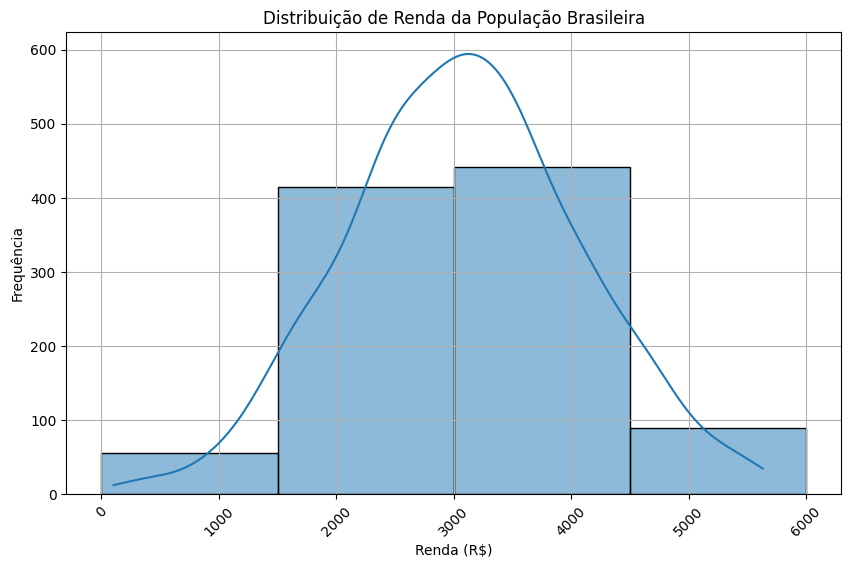

Faixa de renda predominante: (3000.0, 4500.0]
A função densidade de probabilidade (PDF) pode ser visualizada pela curva suave (KDE) no gráfico acima.


In [6]:
# 4. Faixa de renda predominante e função densidade

# Criando faixas de renda de 1500 em 1500 reais
bins = np.arange(0, df['renda'].max() + 1500, 1500)
df['faixa_renda'] = pd.cut(df['renda'], bins=bins)

# Contando pessoas por faixa de renda
contagem_faixas = df['faixa_renda'].value_counts().sort_index()

# Faixa com maior frequência
faixa_predominante = contagem_faixas.idxmax()

# Plotando o histograma para visualizar a distribuição
plt.figure(figsize=(10, 6))
sns.histplot(df['renda'], bins=bins, kde=True)
plt.title('Distribuição de Renda da População Brasileira')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(f"Faixa de renda predominante: {faixa_predominante}")
print("A função densidade de probabilidade (PDF) pode ser visualizada pela curva suave (KDE) no gráfico acima.")

Média da renda: R$ 3082.54
Variância da renda: 993156.23
Desvio padrão da renda: 996.57


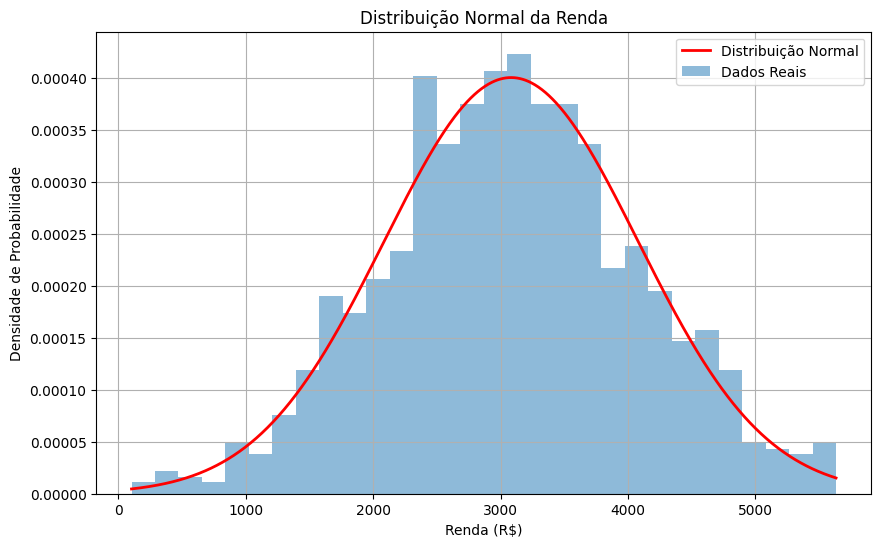

In [7]:
# 5. Média, variância e distribuição normal da renda

# Calculando média e variância
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()
desvio_padrao = df['renda'].std()

print(f"Média da renda: R$ {media_renda:.2f}")
print(f"Variância da renda: {variancia_renda:.2f}")
print(f"Desvio padrão da renda: {desvio_padrao:.2f}")

# Criando distribuição normal
x = np.linspace(df['renda'].min(), df['renda'].max(), 1000)
pdf = stats.norm.pdf(x, media_renda, desvio_padrao)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'r-', lw=2, label='Distribuição Normal')
plt.hist(df['renda'], bins=30, density=True, alpha=0.5, label='Dados Reais')
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 6. Probabilidade de 243 mil com pós em 1 milhão

# Probabilidade de pós-graduação na amostra
prob_pos = len(df[df['escolaridade'] == 'Pós-graduação']) / len(df)

# Parâmetros da distribuição binomial
n = 1000000  # 1 milhão de habitantes
k = 243000   # 243 mil com pós
p = prob_pos # probabilidade de pós

# Usando aproximação normal para a binomial
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Calculando a probabilidade (usando correção de continuidade)
prob = stats.norm.cdf(k + 0.5, loc=mu, scale=sigma) - stats.norm.cdf(k - 0.5, loc=mu, scale=sigma)

print(f"Probabilidade de encontrar 243 mil pessoas com pós em 1 milhão: {prob:.4%}")

Probabilidade de encontrar 243 mil pessoas com pós em 1 milhão: 0.0000%


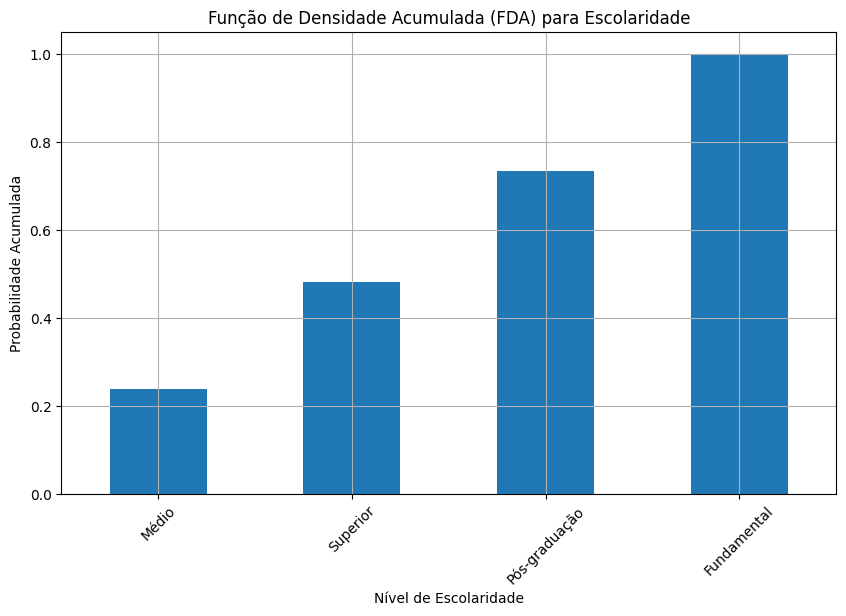

FDA para Escolaridade:
escolaridade
Médio            0.238
Superior         0.481
Pós-graduação    0.734
Fundamental      1.000
Name: proportion, dtype: float64


In [9]:
# 7. Função de densidade acumulada para escolaridade

# Contando cada nível de escolaridade
contagem_escolaridade = df['escolaridade'].value_counts(normalize=True).sort_values()

# Calculando a FDA
fda = contagem_escolaridade.cumsum()

# Plotando
plt.figure(figsize=(10, 6))
fda.plot(kind='bar')
plt.title('Função de Densidade Acumulada (FDA) para Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Probabilidade Acumulada')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("FDA para Escolaridade:")
print(fda)

In [10]:
# 8. Margem de erro para nível intermediário de inglês

# Proporção de pessoas com inglês intermediário
p = len(df[df['nível de proficiência em inglês'] == 'Intermediário']) / len(df)
n = len(df)

# Nível de confiança (95%)
z = 1.96

# Margem de erro
margem_erro = z * np.sqrt((p * (1 - p)) / n)

print(f"Margem de erro amostral para nível intermediário de inglês: ±{margem_erro:.2%}")

Margem de erro amostral para nível intermediário de inglês: ±2.91%


In [11]:
# 9. Probabilidade de 60 pessoas com renda mil acima da média

# Média já calculada anteriormente
renda_alvo = media_renda + 1000

# Probabilidade de uma pessoa ter renda > renda_alvo
prob_individual = len(df[df['renda'] > renda_alvo]) / len(df)

# Usando distribuição binomial
n = len(df)  # tamanho da amostra
k = 60       # número de sucessos desejado

# Calculando a probabilidade exata (pode ser computacionalmente intensivo para n grande)
prob = stats.binom.pmf(k, n, prob_individual)

print(f"Probabilidade de encontrar 60 pessoas com renda > R$ {renda_alvo:.2f}: {prob:.4%}")

Probabilidade de encontrar 60 pessoas com renda > R$ 4082.54: 0.0000%


In [12]:
# 10. Probabilidade para Sudeste, homem, fundamental e renda > 2 mil

# Definindo estados do Sudeste
sudeste = ['SP', 'RJ', 'MG', 'ES']

# Filtrando o DataFrame
filtro = (df['estado'].isin(sudeste)) & \
         (df['sexo'] == 'M') & \
         (df['escolaridade'] == 'Fundamental') & \
         (df['renda'] > 2000)

# Contando casos que atendem aos critérios
casos_favoraveis = len(df[filtro])

# Probabilidade
prob = casos_favoraveis / len(df)

print(f"Probabilidade: {prob:.4%}")

Probabilidade: 1.9000%
